<a href="https://colab.research.google.com/github/ploydang/emag_acy67/blob/main/66050225_lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://raw.githubusercontent.com/nayot/emag-jupyter/refs/heads/main/pics/lecture_banner.webp)
# LECTURE 04 E-Field due to More Complicated Charges

# 514336 Engineering Electromagnetic Field

## ขนาดของสนามไฟฟ้าเนื่องจากประจุแบบจุด

จากสนามไฟฟ้า เนื่องจากประจุแบบจุด ณ จุดใด ๆ $\mathbf{r}$ ที่วางอยู่ที่ $\mathbf{r'}$

$$\mathbf{E(r)}=\frac{Q}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}\qquad\mathrm{V/m}$$

หากประจุดังกล่าววางอยู่ที่จุด origin จะได้ว่า
$$\mathbf{E(r)}=\frac{Q}{4\pi\epsilon_0 r^2}\mathbf{a}_r$$

และ
$$E(\mathbf{r})=|\mathbf{E(r)}|=\frac{Q}{4\pi\epsilon_0 r^2}\mathbf{a}_r$$


เมื่อ $\mathbf{r}$ คือ เวคเตอร์ตำแหน่งที่ชี้ไปยังจุดที่สนใจหรือจุดสังเกต $r$ คือระยะระหว่างจุดที่สนใจกับจุด origin และ $\mathbf{a}_r$ คือ Unit Vector ที่แสดงทิศทางของสนามไฟฟ้า ณ จุดที่สนใจ

**ตัวอย่าง** พล็อตขนาดของสนามไฟฟ้าเนื่องจากประจุ $Q=1~\mu\mathrm{C}$ ที่วางอยู่ที่จุดกำเนิด เทียบกับระยะทาง $r$

In [1]:
# Numerical Function E(r)
import numpy as np
import sympy as smp
from scipy.constants import pi, epsilon_0


In [2]:
# กำหนดตัวแปรต้น
x, y = smp.symbols('x y', real=True)

In [3]:
# vector ตำแหน่ง/ขจัด
r = smp.Matrix([x, y])
rp = smp.Matrix([0, 0])
R = r - rp

# ขนาดประจุ
Q = 1e-6

# สนามไฟฟ้า
E = Q / (4 * pi * epsilon_0) * R / R.norm()**3
E

Matrix([
[8987.5517861708*x/(x**2 + y**2)**(3/2)],
[8987.5517861708*y/(x**2 + y**2)**(3/2)]])

In [9]:
# Lambdify
Ex = smp.lambdify([x, y], E[0])
Ey = smp.lambdify([x, y], E[1])

def E_Q(x, y):
    return np.array([Ex(x, y),Ey(x, y)])

E_Q(1, 2)

array([ 803.87106981, 1607.74213961])

  Cloning https://github.com/nayot/libemag (to revision main) to /tmp/pip-req-build-zb40vig4
  Running command git clone --filter=blob:none --quiet https://github.com/nayot/libemag /tmp/pip-req-build-zb40vig4
  Resolved https://github.com/nayot/libemag to commit 2fb902418f70ad2dfc3a863f527bf4dad99506b7
  Preparing metadata (setup.py) ... done


<Axes: xlabel='x', ylabel='y'>

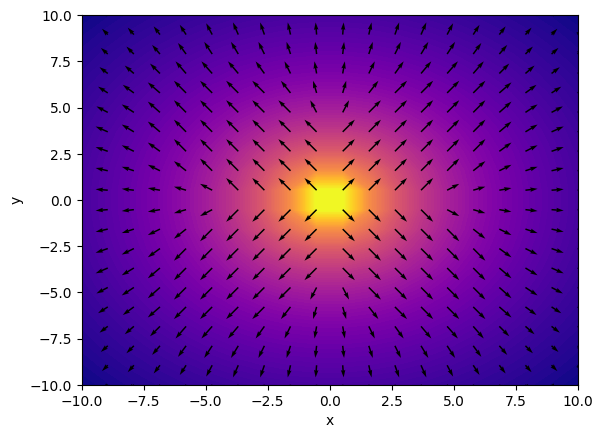

In [14]:
# field plot
!pip install git+https://github.com/nayot/libemag@main#subdirectory=libemag
from libemag.plots import field_plot
field_plot(E_Q, contour=True)

**พล็อตขนาดของสนามไฟฟ้าเทียบกับระยะทาง $x$**

ให้ $y=0$ พล็อต $|\mathbf{E}(x)|$

In [15]:
!pip install scienceplots
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['notebook', 'grid', 'science'])

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['notebook', 'grid', 'science'])

In [56]:
# กำหนด range ของ x
from numpy.linalg import norm
N = 100
x = np.linspace(-10, 10, N)
y = 0.0 * np.ones(N)


# คำนวณสนามไฟฟ้า
E_field = E_Q(x, y)

### Transpose E_field เพื่อให้ได้ (x, y)
E_T = E_field.T

# หา norm บน axis=1 (along the row)
E_N = norm(E_field.T, axis=1)



In [68]:
# Plot
!pip install git+https://github.com/nayot/libemag@main#subdirectory=libemag
plt.figure(figsize=(6, 4))
plt.plot(x, E_N)
plt.xlabel('x')
plt.ylabel('y')

  Cloning https://github.com/nayot/libemag (to revision main) to /tmp/pip-req-build-3uh_o06m
  Running command git clone --filter=blob:none --quiet https://github.com/nayot/libemag /tmp/pip-req-build-3uh_o06m
  Resolved https://github.com/nayot/libemag to commit 2fb902418f70ad2dfc3a863f527bf4dad99506b7
  Preparing metadata (setup.py) ... done


Text(0, 0.5, 'y')

Error in callback <function _draw_all_if_interactive at 0x79f5129b3920> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 600x400 with 1 Axes>

## สนามไฟฟ้าเนื่องจากประจุแบบไดโพล
### Activity 4.1
ประจุขนาด $1~\mu\mathrm{C}$ และ $-1~\mu\mathrm{C}$ วางอยู่ห่างกันเป็นระยะทาง $1~\mathrm{m}$ บนแกน $y$ ห่างจากจุด origin เท่า ๆ กัน จงปรับปรุงโปรแกรมข้างต้น เพื่อสร้างฟังก์ชันที่ return ค่าเวคเตอร์ของสนาม ณ จุดสังเกตใด ๆ (1 คะแนน)

In [62]:
import sympy as smp
from scipy.constants import pi, epsilon_0

def E_dipole(xv, yv):
    # YOUR CODE HERE
    # กำหนดตัวแปรที่จะใช้
    x, y = smp.symbols('x y', real=True)

    # เวคเตอร์ตำแหน่ง
    r = smp.Matrix([x, y]) # จุดสังเกต
    rp = smp.Matrix([0, 0.5]) # ประจุบวก
    rn = smp.Matrix([0, -0.5]) # ประจุลบ

    # Displacement vectors เวคเตอร์ขจัด
    Rp = r - rp
    Rn = r - rn

    # หาสนามไฟฟ้าเนื่องจากประจุทั้งสอง
    Ep = 1e-6 / (4 * pi * epsilon_0) * Rp / Rp.norm()**3
    En = -1e-6 / (4 * pi * epsilon_0) * Rn / Rn.norm()**3

    # สนามไฟฟ้ารวม
    E = Ep + En

    # Lambdify E
    Ex = smp.lambdify([x, y], E[0])
    Ey = smp.lambdify([x, y], E[1])

    def E_func(x, y):
        return np.array([
            Ex(x, y),
            Ey(x, y)
        ])

    return E_func(xv, yv)
    raise NotImplementedError()

In [63]:
# Testing - ห้ามแก้ไข Cell นี้โดยเด็ดขาด
assert -50.029 <= E_dipole(5, -4)[0] <= -50.028
assert 5.49 <= E_dipole(5, -4)[1] <= 5.50

### Activity 4.2
ใช้ field_plot() พล็อตสนามไฟฟ้าเนื่องจากประจุแบบไดโพลคู่นี้ (1 คะแนน)

In [66]:
from libemag.plots import field_plot
import matplotlib.pyplot as plt

def dipole_plot():
    # YOUR CODE HERE
    plt.figure(figsize=(5, 5))
    field_plot(E_dipole, contour=True, x_min=-2, x_max=2, y_min=-2, y_max=2)
    plt.scatter(0, 0.5, color='r', s=50)
    plt.scatter(0, -0.5, color='b', s = 50)
    return True

    raise NotImplementedError()

In [69]:
# Testing -- ห้ามแก้ไข Cell นี้โดยเด็ดขาด
try:
    assert dipole_plot()
except:
    raise AssertionError

Error in callback <function _draw_all_if_interactive at 0x79f5129b3920> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 500x500 with 1 Axes>

## เปรียบเทียบสนามไฟฟ้าเนื่องจากประจุแบบจุดและประจุแบบไดโพล

### Activity 4.3
พล็อตขนาดของสนามไฟฟ้าเนื่องจากประจุแบบจุด เปรียบเทียบกับขนาดของสนามไฟฟ้าเนื่องจากประจุแบบไดโพล โดยกำหนดให้ $y=0$ (1 คะแนน)

In [ ]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])

def compare_plot():
    # กำหนด range ของ x ที่จะ plot
    N = 100
    x = np.linspace(-5, 5, N)
    y = np.zeros(N)

    # Initialise plot figure
    plt.figure(figsize=(5, 4))

    # YOUR CODE HERE
    plt.plot(x, np.linalg.norm(E_Q(x, y).T, axis=1))
    plt.plot(x, np.linalg.norm(E_dipole(x, y).T, axis=1))
    plt.ylim([0, 10e3])
    plt.xlabel('x')
    plt.ylabel('E')
    return True
    raise NotImplementedError()

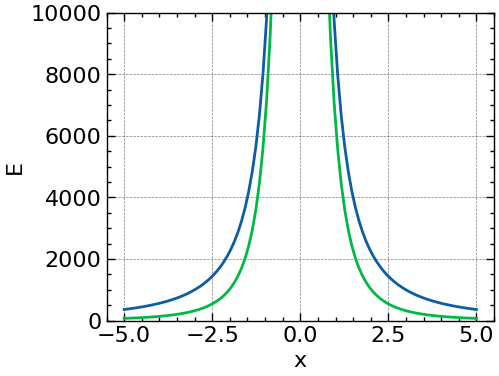

In [ ]:
# Testing - ห้ามแก้ไข Cell นี้โดยเด็ดขาด
try:
    assert compare_plot()
except:
    raise AssertionError

## สนามไฟฟ้าเนื่องจากประจุแบบจุดที่วางเรียงกัน

### Activity 4.4
มีประจุขนาด $1~\mu\mathrm{C}$ จำนวน 11 ตัว วางเรียงห่างกันกันบนแนวแกน y ตัวละ $1~\mathrm{m}$ โดยสมมาตรกับแกน x จงพล็อตสนามไฟฟ้าที่ประจุดังกลางแผ่ออกมา (1 คะแนน)

In [ ]:
# ทดลองเขียน Code ที่นี่ก่อนสะดวกกว่า แล้วจึงนำไปบรรจุในฟังก์ชันคำตอบ
import numpy as np
from libemag.plots import field_plot
from libemag.emag_initials import pi, epsilon_0, norm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

### YOUR CODE HERE
# ฟังก์ชันที่ return ค่าของสนาม E ที่ตำแหน่ง (x, y) เนื่องจากประจุขนาด 1 uC ที่วางอยู่ ณ ตำแหน่ง (xp, yp)
def E(x, y, xp, yp):
    # เวคเตอร์ตำแหน่ง
    r = np.array([x, y])
    rp = np.array([xp, yp])

    # Displacement Vector
    R = r - rp

    # หาสนาม E จากกฎของคูลอมป์
    return 1e-6 / (4 * pi * epsilon_0) * R / norm(R)**3

def E_line_charge(x, y):
    y_range = np.arange(-5, 6)

    E_field = np.array([0.0, 0.0])
    for yp in y_range:
        E_field += E(x, y, 0, yp)

    return E_field

E_line_charge(1, 1)


ModuleNotFoundError: No module named 'libemag'

In [ ]:
import sympy as smp
import numpy as np
from libemag.plots import field_plot
from libemag.emag_initials import pi, epsilon_0, norm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# YOUR CODE HERE
def E(x, y, xp, yp):
    # เวคเตอร์ตำแหน่ง
    r = np.array([x, y])
    rp = np.array([xp, yp])

    # Displacement Vector
    R = r - rp

    # หาสนาม E จากกฎของคูลอมป์
    return 1e-6 / (4 * pi * epsilon_0) * R / norm(R)**3

def E_line_charge(x, y):
    y_range = np.arange(-5, 6)

    E_field = np.array([0.0, 0.0])
    for yp in y_range:
        E_field += E(x, y, 0, yp)

    return E_field

def solution():
    field_plot(E_line_charge, contour=True, y_min=-10, y_max=10)
    yp = np.arange(-5, 6)
    xp = np.zeros(len(yp))
    plt.scatter(xp, yp, color='b', s=50)
    return True
    raise NotImplementedError()

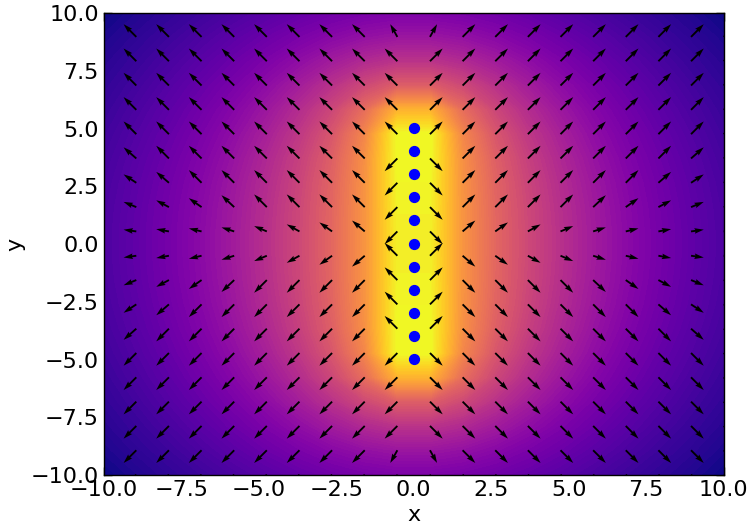

In [ ]:
# Testing - ห้ามแก้ไข Cell นี้โดยเด็ดขาด

assert solution()